In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpimg
import cv2
from math import *

(400, 680, 3)


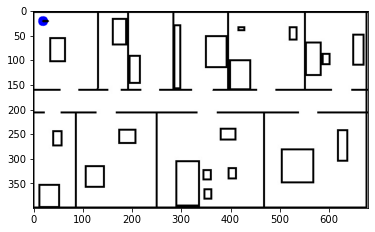

In [6]:
# read image Map.jpg 
img = cv2.imread('Map.jpg')
print(img.shape)
x = 20
y = 20
Θ = 0

img_test = img.copy()
if(img[y][x][0]!=0 and img[y][x][1]!=0 and img[y][x][2]!=0):
    img_test = cv2.circle(img_test, (x, y), 10, (0, 0, 255), -1)
    cv2.line(img_test, (x, y), (round(x+10*np.cos(Θ*np.pi/180)), round(y+10*np.sin(Θ*np.pi/180))), (0, 0, 0), 3)
    img2 = img.copy()
    img3 = img.copy()
    plt.imshow(img_test)
else:
    print("The robot can't be placed on an obstacle")

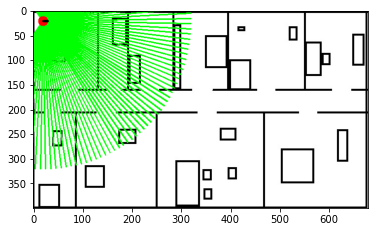

In [7]:
def draw_rays(x,y,Θ):

    if(img[y][x][0]!=0 and img[y][x][1]!=0 and img[y][x][2]!=0):

        for i in range(-125+Θ,125+Θ+2,2):
            resolution_x = np.cos(i*np.pi/180)
            resolution_y = np.sin(i*np.pi/180)
            cv2.line(img2, (x, y), (round(x+300*resolution_x), round(y+300*resolution_y)), (0, 255, 0), 2)

        cv2.circle(img2, (x, y), 10, (255, 0, 0), -1)
        cv2.line(img2, (x, y), (round(x+10*np.cos(Θ*np.pi/180)), round(y+10*np.sin(Θ*np.pi/180))), (0, 0, 0), 3)
        plt.imshow(img2)
    else: 
        print("Can't draw rays from this position")


draw_rays(x,y,Θ)

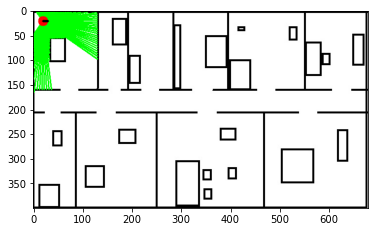

In [9]:
def draw_rays_until_obstacle(x,y,Θ):
    f = open("measurements.txt", "w")
    if(img[y][x][0]!=0 and img[y][x][1]!=0 and img[y][x][2]!=0):
        for i in range(-125+Θ,125+Θ+2,2):
            resolution_x = np.cos(i*np.pi/180)
            resolution_y = np.sin(i*np.pi/180)
            # loop all over the 300 pixels from your position to the end of the line 
            # if there is an obstacle(black pixel), stop the loop and draw the line to the obstacle
            for j in range(1,301):
                if(img[round(y+j*resolution_y)][round(x+j*resolution_x)][0]==0 and img[round(y+j*resolution_y)][round(x+j*resolution_x)][1]==0 and img[round(y+j*resolution_y)][round(x+j*resolution_x)][2]==0 or j==300):
                    end_point_x = round(x+j*resolution_x)
                    end_point_y = round(y+j*resolution_y)
                    m = np.sqrt((x-end_point_x)**2+(y-end_point_y)**2)
                    f.write(str(m)+"\n")
                    cv2.line(img3, (x, y), (round(x+j*resolution_x), round(y+j*resolution_y)), (0, 255, 0), 2)
                    break
        cv2.circle(img3, (x, y), 10, (255, 0, 0), -1)
        cv2.line(img3, (x, y), (round(x+10*np.cos(Θ*np.pi/180)), round(y+10*np.sin(Θ*np.pi/180))), (0, 0, 0), 3)
        
        plt.imshow(img3)
        cv2.imwrite('req1.jpeg', img3)
    else: 
        print("Can't draw rays from this position")
        
draw_rays_until_obstacle(x,y,Θ)

In [10]:
img_req2 = img.copy()

# convert the image to grayscale
# convert the imgage to gray scale using opencv function cv2.cvtColor
gray = cv2.cvtColor(img_req2, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
cv2.imshow('gray',blur)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(blur.max(),blur.min())
# cv2.imwrite('gray.jpeg', blur)


255 0


In [13]:
# read the file measurements.txt and put each line in a list
f = open("measurements.txt", "r")
measurements = []
for i in range(0,126):
    measurements.append(round(float(f.readline())))
f.close()
print(measurements)


[22, 21, 21, 21, 20, 20, 20, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 23, 24, 24, 25, 26, 27, 28, 30, 31, 33, 34, 37, 39, 42, 45, 49, 54, 60, 68, 78, 92, 109, 111, 110, 110, 110, 110, 110, 110, 111, 111, 112, 113, 114, 115, 116, 118, 119, 121, 123, 126, 128, 131, 134, 55, 54, 52, 50, 48, 46, 45, 44, 42, 42, 40, 40, 40, 38, 38, 36, 37, 40, 43, 49, 57, 66, 80, 140, 140, 139, 139, 139, 139, 140, 145, 120, 97, 83, 73, 64, 57, 53, 48, 44, 42, 39, 36, 35, 33]


In [26]:
def likelihood_of_points(measurements,img):
    # loop over all the pixels in the image
    # for each pixel, calculate the likelihood of the measurements
    # img.shape[0],img.shape[1]
    final = np.zeros((img.shape[0],img.shape[1]))
    for i in range(10,70):
        for j in range(10,70):
            if(img[i][j]>100):
                final[i][j] = 0
                continue
            # loop over all the orientations
            likelihood_of_orientation = []
            for k in range(0,361):
                # loop over all the measurements
                likelihood_of_measurement = 0
                for n,l in zip(range(0,126),range(-125,127,2)):
                    # calculate where the line should end given the current position and length of the line
                    # calculate the likelihood of the measurement given the current position and orientation
                    # add the likelihood to the list of likelihoods
                    resolution_x = np.cos((k+l)*np.pi/180)
                    resolution_y = np.sin((k+l)*np.pi/180)
                    end_point_x = round(j+measurements[n]*resolution_x)
                    end_point_y = round(i+measurements[n]*resolution_y)
                    if(end_point_x>=0 and end_point_x<img.shape[1] and end_point_y>=0 and end_point_y<img.shape[0]):
                        if(img[end_point_y][end_point_x]==0):
                            likelihood_of_measurement += np.log10(0.1)
                        else:
                            likelihood_of_measurement +=np.log10(img[end_point_y][end_point_x])
                    else:
                        likelihood_of_measurement += np.log10(0.01)
                likelihood_of_orientation.append(likelihood_of_measurement)
            final[i][j] = np.exp(max(likelihood_of_orientation))*255

    cv2.imshow('final',final)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return final

img_like = blur.copy()
req2_props = likelihood_of_points(measurements,img_like)
cv2.imwrite('req2-props.jpeg', req2_props)

True

In [27]:
max_prop = max(req2_props.flatten())
final2 = np.zeros((img.shape[0],img.shape[1]))
for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
        if(req2_props[i][j]==max_prop):
            print(i,j)
            final2[i][j] = 255
cv2.imwrite('req2-highest.jpeg', final2)
cv2.imshow('final2',final2)
cv2.waitKey(0)
cv2.destroyAllWindows()

20 21


In [25]:
print(max(req2_props.flatten()))
for i in req2_props:
    print(i)

2.3738911053393503e+131
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.